In [3]:
import sys
import os
import random

import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns without wrapping
pd.set_option('display.width', 1000)  # Increase width for better display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# add src folder of functions to PATH
if 'C:/Users/cltur/Desktop/Apziva/customer_happiness/src' not in sys.path:
    sys.path.append('C:/Users/cltur/Desktop/Apziva/customer_happiness/src')

In [4]:
from data_exploration import data_exploration

In [5]:
df = pd.read_csv('../data/raw/ACME-HappinessSurvey2020.csv')

In [6]:
# List of all features excluding the target variable 'Y'
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
# Designate target variable
target = 'Y'

In [7]:
# Choose a random number as a seed for tests
random_seed = random.randint(1000, 9999)

**Shape of the dataset:**

(126, 7)




**First 6 rows of the dataset:**

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
5  1   5   5   3   5   5   5




**Dataset info:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB




**Unique values in each column:**

Y: [0 1]
X1: [3 5 4 1]
X2: [3 2 4 5 1]
X3: [3 2 4 5 1]
X4: [4 5 3 2 1]
X5: [2 4 3 5 1]
X6: [4 3 5 2 1]




**Missing values in each feature:**

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64




**Summary statistics of the dataset:**

                Y          X1          X2          X3          X4          X5          X6
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794    4.253968
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641    0.809311
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000    4.000000
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000    4.000000
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000    5.000000
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000    5.000000




**Columns with constant values:**

No columns in the dataset contain the same value for every row.




**Correlation matrix:**

           Y        X1        X2        X3        X4        X5        X6
Y   1.000000  0.280160 -0.024274  0.150838  0.064415  0.224522  0.167669
X1  0.280160  1.000000  0.059797  0.283358  0.087541  0.432772  0.411873
X2 -0.024274  0.059797  1.000000  0.184129  0.114838  0.039996 -0.062205
X3  0.150838  0.283358  0.184129  1.000000  0.302618  0.358397  0.203750
X4  0.064415  0.087541  0.114838  0.302618  1.000000  0.293115  0.215888
X5  0.224522  0.432772  0.039996  0.358397  0.293115  1.000000  0.320195
X6  0.167669  0.411873 -0.062205  0.203750  0.215888  0.320195  1.000000




**Missing data value counts in each column:**

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64




**Distribution of data types in the dataset:**

int64    7
Name: count, dtype: int64




**Checking for negative values in 'X1' column:**

Empty DataFrame
Columns: [Y, X1, X2, X3, X4, X5, X6]
Index: []




**Non-null value counts for each feature:**

Y     126
X1    126
X2    126
X3    126
X4    126
X5    126
X6    126
dtype: int64




**First 5 rows of the dataset:**

   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5




**Last 5 rows of the dataset:**

     Y  X1  X2  X3  X4  X5  X6
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5




**Skewness and Kurtosis of each feature:**

+-----------+------------+------------+
| Feature   |   Skewness |   Kurtosis |
+===========+============+============+
| Y         |      -0.19 |      -1.99 |
+-----------+------------+------------+
| X1        |      -1.06 |       1.02 |
+-----------+------------+------------+
| X2        |       0.27 |      -0.6  |
+-----------+------------+------------+
| X3        |      -0.2  |      -0.11 |
+-----------+------------+------------+
| X4        |      -0.42 |       0.28 |
+-----------+------------+------------+
| X5        |      -0.7  |      -0.31 |
+-----------+------------+------------+
| X6        |      -0.96 |       0.94 |
+-----------+------------+------------+




**Histograms of Numeric Columns:**

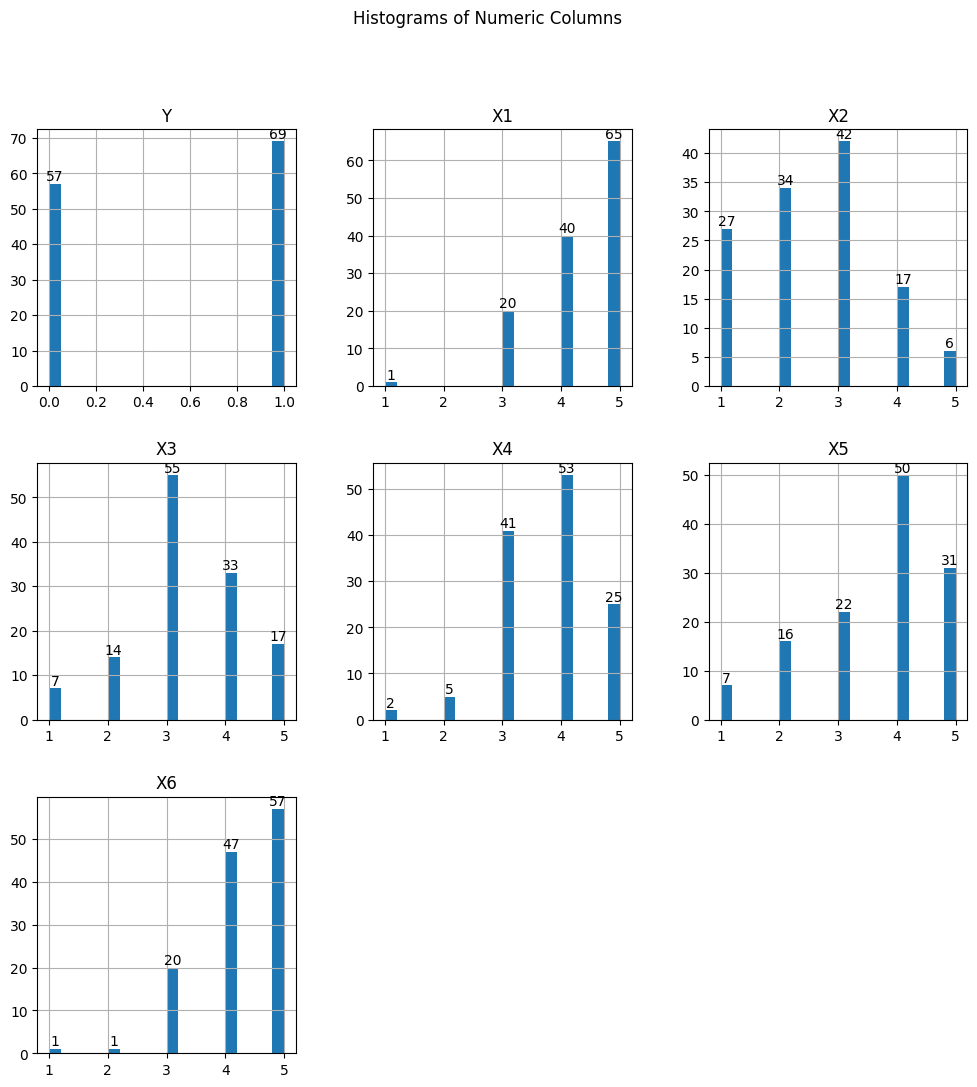

**Box plot of the dataset:**

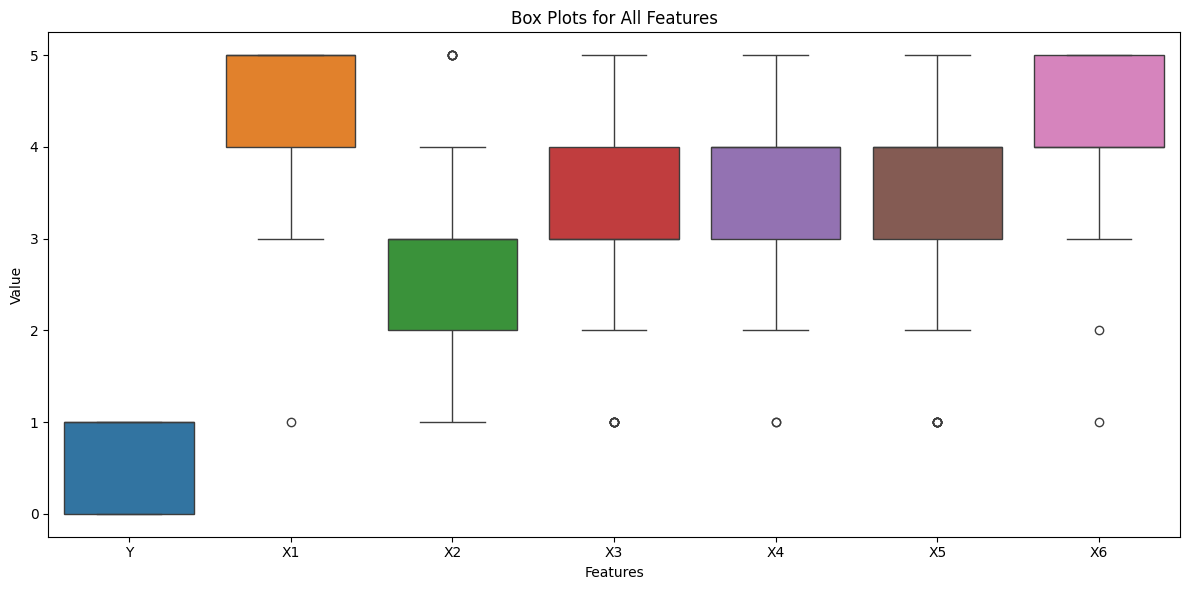

In [8]:
# Call the function to explore the data
data_exploration(df)

# Initial Data Exploration

## Summary of Findings
We explored a dataset with:
- 126 entries and 7 columns.
- One target variable (`Y`), indicating customer satisfaction:
  - Binary values: 0 for unhappy, 1 for happy.
- Six features (`X1` to `X6`), representing responses to survey questions:
  - Ordinal values ranging from 1 to 5.
- All datatype for target and features are Int64 value

### Key Insights:
- **No Missing Data**: All features and the trarget variable have a valid and complete data with no missing values.
- **Feature Range**: Features `X1` to `X6` all have ordinal values that range from 1 to 5. They Indicating the level of agreement with various survey statementsor questions.
- **Target Distribution**: The target variable `Y` is binary, distinguishing between self reported happy and unhappy customers.

## Target Variable Y
- The mean of Y is **0.55**, indicating that slightly more customers are happy than unhappy.
- However, this also means that **just under 50%** of your clients rate themselves as **unhappy** customers.
- The target variable has a near **balanced distribution**, with 54% happy customers and 46% unhappy customers.

## Feature Analysis

### X1 (My order was delivered on time)
- 25% of clients rate this feature at or below **4**, and 75% rate it at or below **5**.
- The high upper quartile value suggests that most customers are satisfied with timely deliveries.

### X2 (Contents of my order were as I expected)
- 25% of clients rate this feature at or below **2**, and 75% rate it at or below **3**.
- The lower ratings suggest that many customers perceive issues with the contents meeting their expectations.

### X3 (I ordered everything I wanted to order)
- 50% of clients rate this feature at or below **3**, and 75% rate it at or below **4**.
- The median score of **3** indicates mixed opinions, with a notable proportion of customers feeling neutral about ordering everything they wanted.

### X4 (I paid a good price for my order)
- 25% of clients rate this feature at or below **3**, and 75% rate it at or below **4**.
- While the majority of ratings cluster around **3** and **4**, this suggests that customers generally feel the pricing is reasonable but not exceptional.

### X5 (I am satisfied with my courier)
- 25% of clients rate this feature at or below **3**, and 75% rate it at or below **4**.
- These ratings indicate moderate satisfaction with courier services.

### X6 (The app makes ordering easy for me)
- 25% of clients rate this feature at or below **4**, and 75% rate it at or below **5**.
- The high scores reflect that most customers find the app easy to use.

# Univariate Analysis 

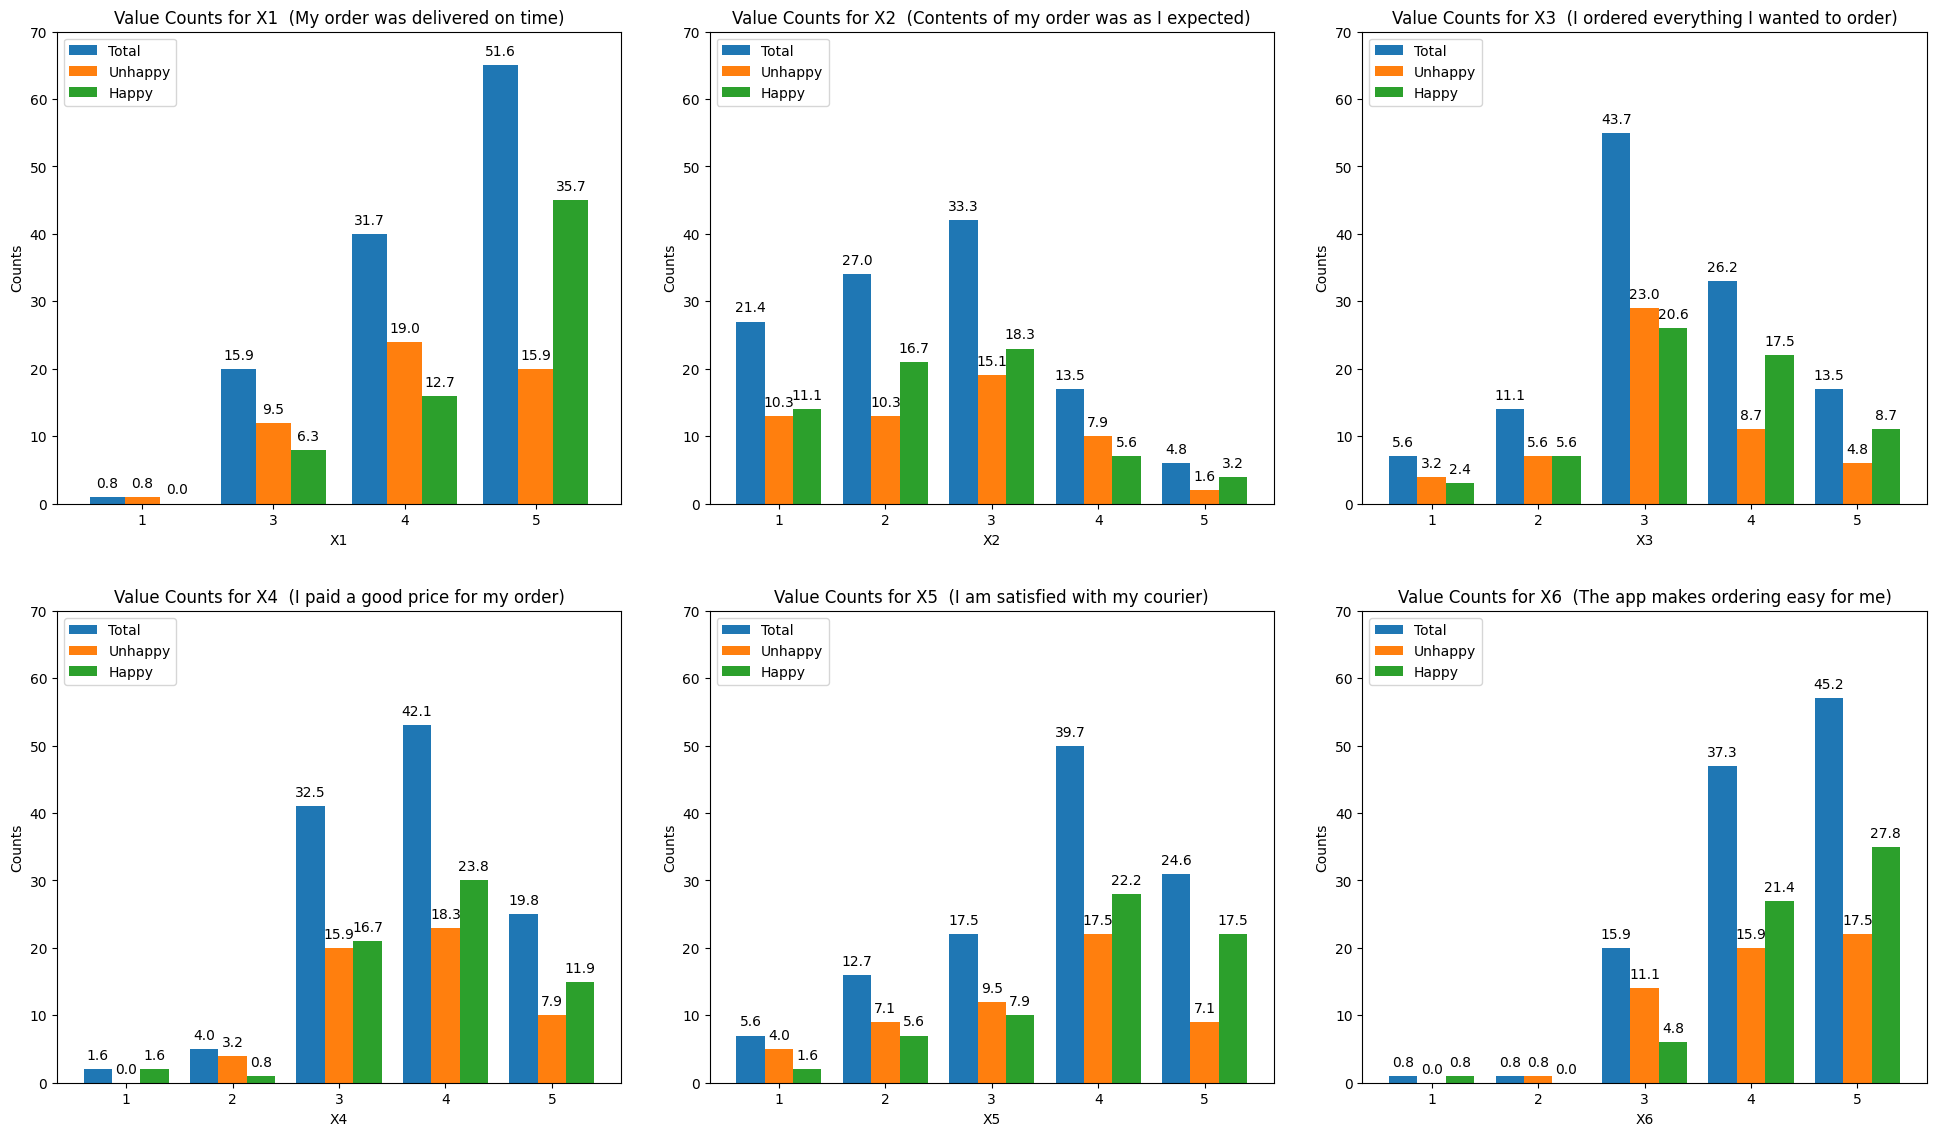

In [9]:
# List of all features excluding the target variable 'Y'
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Dictionary mapping features to their corresponding questions
questions = {
    'X1': 'My order was delivered on time',
    'X2': 'Contents of my order was as I expected',
    'X3': 'I ordered everything I wanted to order',
    'X4': 'I paid a good price for my order',
    'X5': 'I am satisfied with my courier',
    'X6': 'The app makes ordering easy for me'
}

# Find the maximum value count across all features to set the common Y-axis limit
max_count = max(df[feature].value_counts().max() for feature in features) + 5

# Set up the figure with multiple columns
plt.figure(figsize=(20, 12))

# Determine the number of columns (e.g., 3 features per row)
n_cols = 3
n_rows = -(-len(features) // n_cols)  # Calculate the number of rows required

# Loop through each feature to plot value counts
for i, column in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a subplot for each feature in a grid

        # Get the value counts for the total, unhappy, and happy customers
    total_counts = df[column].value_counts().sort_index()
    unhappy_counts = df[df['Y'] == 0][column].value_counts().reindex(total_counts.index, fill_value=0)
    happy_counts = df[df['Y'] == 1][column].value_counts().reindex(total_counts.index, fill_value=0)

    # Create a DataFrame to align the counts for plotting
    counts_df = pd.DataFrame({
        'Total': total_counts,
        'Unhappy': unhappy_counts,
        'Happy': happy_counts
    })

    # Plot the grouped bar chart
    counts_df.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.title(f'Value Counts for {column}  ({questions[column]})')
    plt.xlabel(f'{column}')
    plt.ylabel('Counts')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(loc='upper left')  # Place legend in the upper left

    # Set the common Y-axis limit
    plt.ylim(0, max_count)

    # Add percentage annotations
    for p in plt.gca().patches:
        # Get the height of the bar
        height = p.get_height()
        # Calculate the percentage of the total counts
        percentage = (height / counts_df['Total'].sum()) * 100
        # Add the percentage text on top of the bar
        plt.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}', 
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout(pad=3.0)  # Adjust the padding between subplots

# Display the plots
plt.show()


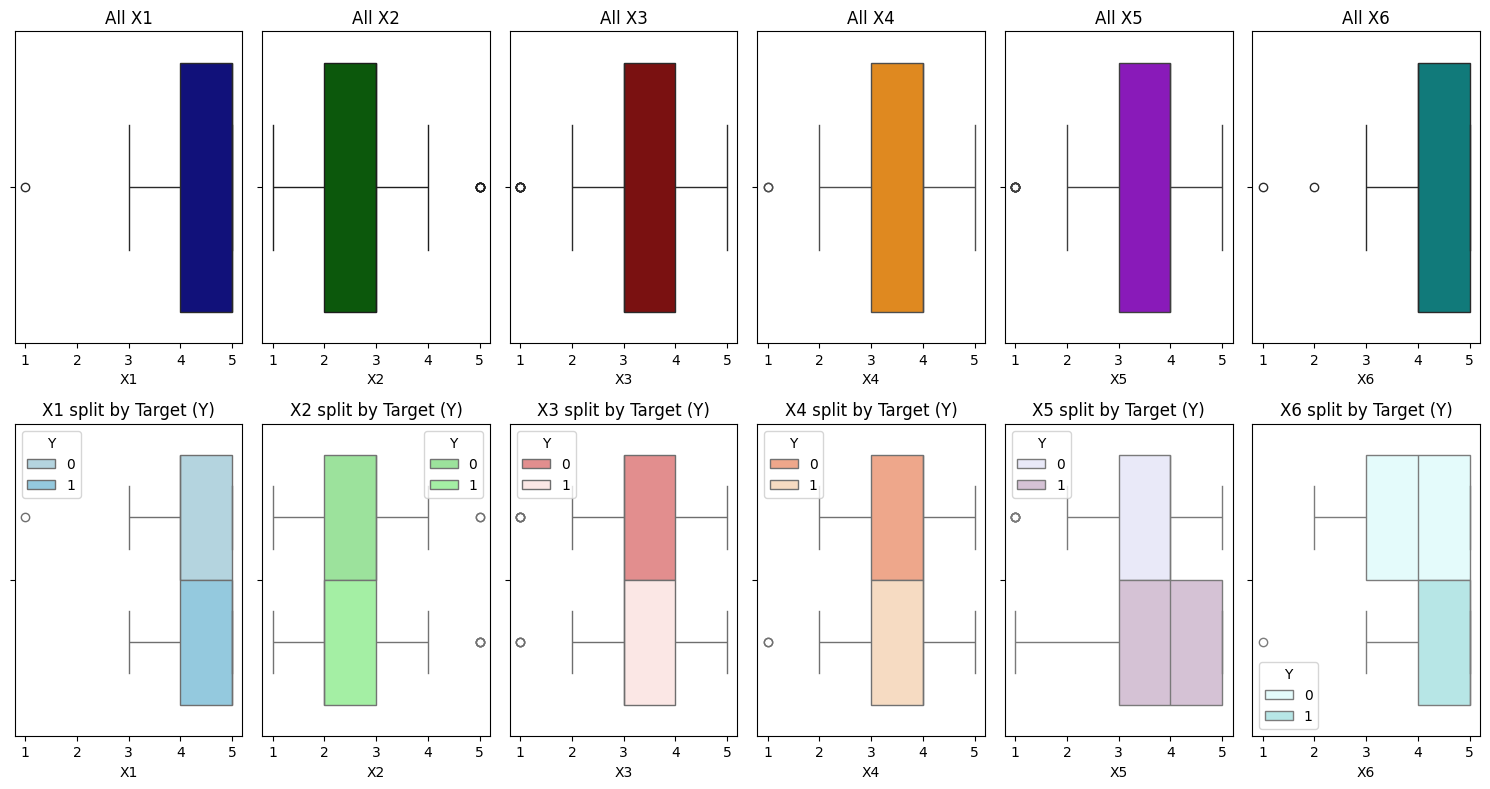

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 8))

# List of features
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']

# Color mapping for each feature
feature_colors = {
    'X1': ['darkblue', 'lightblue', 'skyblue'],
    'X2': ['darkgreen', 'lightgreen', 'palegreen'],
    'X3': ['darkred', 'lightcoral', 'mistyrose'],
    'X4': ['darkorange', 'lightsalmon', 'peachpuff'],
    'X5': ['darkviolet', 'lavender', 'thistle'],
    'X6': ['darkcyan', 'lightcyan', 'paleturquoise']
}

# Create box plots
for idx, feature in enumerate(features):
    plt.subplot(2, len(features), idx + 1)  # First row: all data boxplot
    sns.boxplot(data=df, x=feature, color=feature_colors[feature][0])  # Dark color for all data
    plt.title(f"All {feature}")
    
    plt.subplot(2, len(features), len(features) + idx + 1)  # Second row: split by target variable
    sns.boxplot(data=df, x=feature, hue="Y", palette={0: feature_colors[feature][1], 1: feature_colors[feature][2]})
    plt.title(f"{feature} split by Target (Y)")

    # Add a little space between subplots
    plt.tight_layout()

# Show the plot
plt.show()

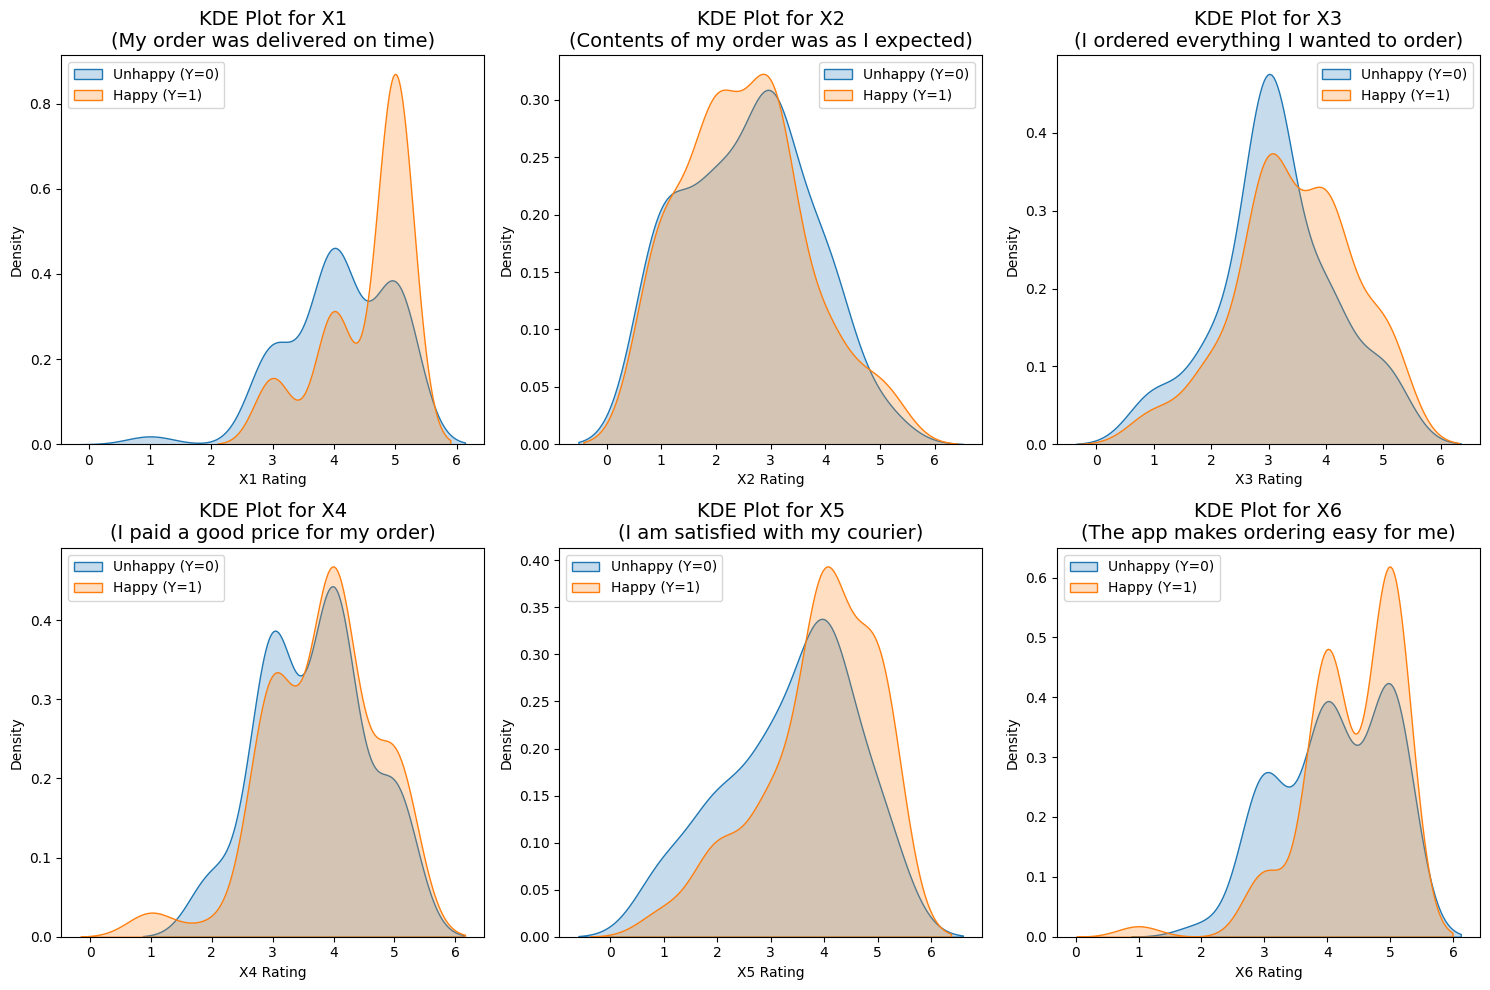

In [9]:
import seaborn as sns
# Visualizing Feature Distributions with KDE Plots with unhappy and happy customers

# Set up the figure with a grid of subplots
plt.figure(figsize=(15, 10))

# Survey questions for each feature
survey_questions = {
    'X1': 'My order was delivered on time',
    'X2': 'Contents of my order was as I expected',
    'X3': 'I ordered everything I wanted to order',
    'X4': 'I paid a good price for my order',
    'X5': 'I am satisfied with my courier',
    'X6': 'The app makes ordering easy for me'
}

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns layout
    sns.kdeplot(df[df['Y'] == 0][feature], label=f'Unhappy (Y=0)', fill=True)
    sns.kdeplot(df[df['Y'] == 1][feature], label=f'Happy (Y=1)', fill=True)
    plt.title(f'KDE Plot for {feature}\n({survey_questions[feature]})', fontsize=14)
    plt.xlabel(f'{feature} Rating')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# KDE Plot Analysis of Customer Sentiments

In this analysis, the Kernel Density Estimate (KDE) plots of both happy and unhappy customers were assessed to understand the distribution of their ratings to a survey question. The following observations were made based on the KDE plots:

- **X1 (Strong candidate)** : The KDE plots for happy and unhappy customers show a strong difference in the density of ratings, making it a promising candidate for inclusion in the model.
  
- **X2 (Weak candidate)**: The KDE plots for both happy and unhappy customers are nearly identical, suggesting that this feature does not contribute to distinguishing between the two populations.

- **X3 (Moderate candidate)**: There is a moderate difference in the KDE plot densities between the happy and unhappy customer populations, indicating a moderate potential for differentiation.

- **X4 (Weak candidate)**: The KDE plots for happy and unhappy customers are very similar, with no clear distinction, suggesting it has little value in the model.

- **X5 (Moderate candidate)**: The KDE plots show a moderate difference in density for happy and unhappy customers, indicating a potential for distinguishing between the two groups.

- **X6 (Moderate candidate)**: There is a moderate difference in the shape of the KDE plots between happy and unhappy customer populations, which suggests some degree of differentiation between the groups.

Based on the KDE plot analysis, **X1** stands out as the most promising feature for inclusion in the model due to its strong difference in ratings density between happy and unhappy customers. Features **X3**, **X5**, and **X6** show moderate differences and could be considered for further exploration. Features **X2** and **X4** do not show significant distinctions and are unlikely to be valuable for the model.

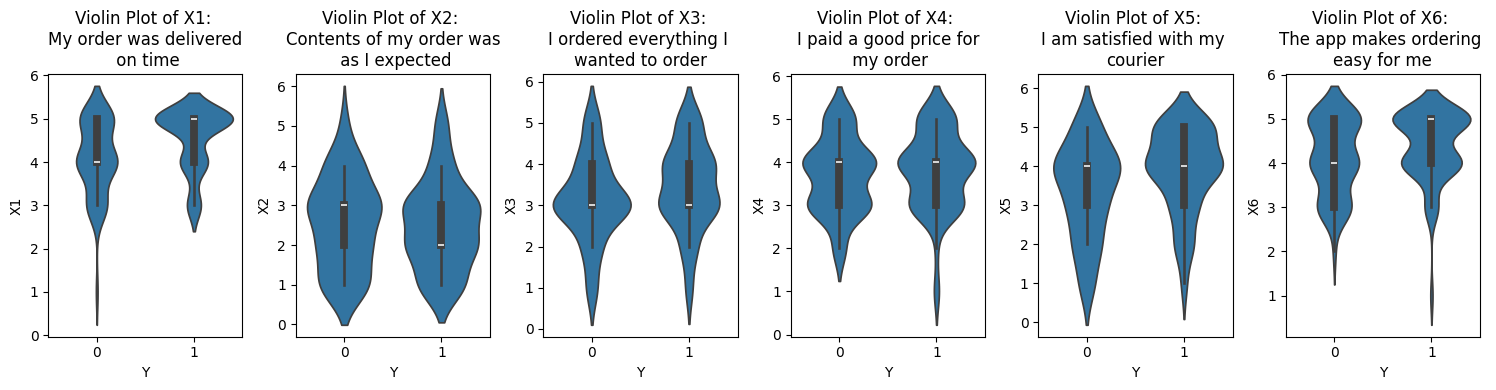

In [10]:
# Violin plots showing density of values chosen for happy and unhappy customers

# Adjust the plot size
plt.figure(figsize=(15, 4))

# Create subplots for each feature
plt.subplot(1, 6, 1)
sns.violinplot(x='Y', y='X1', data=df)
plt.title('Violin Plot of X1: \nMy order was delivered\n on time')

plt.subplot(1, 6, 2)
sns.violinplot(x='Y', y='X2', data=df)
plt.title('Violin Plot of X2: \nContents of my order was\n as I expected')

plt.subplot(1, 6, 3)
sns.violinplot(x='Y', y='X3', data=df)
plt.title('Violin Plot of X3: \nI ordered everything I \nwanted to order')

# Create subplots for X4, X5, and X6
plt.subplot(1, 6, 4)
sns.violinplot(x='Y', y='X4', data=df)
plt.title('Violin Plot of X4: \nI paid a good price for\n my order')

plt.subplot(1, 6, 5)
sns.violinplot(x='Y', y='X5', data=df)
plt.title('Violin Plot of X5: \nI am satisfied with my \ncourier')

plt.subplot(1, 6, 6)
sns.violinplot(x='Y', y='X6', data=df)
plt.title('Violin Plot of X6: \nThe app makes ordering \neasy for me')

# Display the plots
plt.tight_layout()
plt.show()

# Violin Plot Analysis of Customer Sentiments

In this analysis, the violin plots of both happy and unhappy customers were examined to evaluate the distribution of their ratings to a survey question. The following observations were made based on the shape and differences in the violin plots:

- **X1 (Strong candidate)**: The violin plot for X1 displays the most distinct difference between happy and unhappy customers, suggesting it is a strong differentiator for the model.

- **X2 (Weak candidate)**: The violin plots for both happy and unhappy customers are nearly identical, indicating that this feature does not provide clear differentiation between the two populations.

- **X3 (Moderate candidate)**: The violin plots show a slight difference between the happy and unhappy customer populations, indicating some potential for distinction.

- **X4 (Weak candidate)**: The violin plots for happy and unhappy customers are very similar, suggesting minimal potential for differentiation.

- **X5 (Moderate candidate)**: The violin plots display some visible difference between the two populations, indicating a moderate level of differentiation. ****

- **X6 (Moderate candidate)**: The violin plots display some visible difference between the two populations, indicating a moderate level of differentiation. ****


Based on the violin plot analysis, **X1** emerges as the strongest feature due to its clear distinction between happy and unhappy customers. **X3** and **X5** and **X6** show moderate differences and may be useful, while **X2** and **X4** do not show significant distinctions and are less likely to contribute to the model.

# Univariate Analysis Takeaways

The univariate analysis, conducted through box plots, KDE plots, and violin plots, provided valuable insights into the relationship between feature ratings and customer sentiment. The following is a summary of key findings and an analysis of the moderate and strong candidates.

### Strong Candidates
- **X1** (My order was delivered on time) and **X5** (I am satisfied with my courier) consistently demonstrate the ability to differentiate between happy and unhappy customers across all types of plots.

### Moderate Candidates
- **X3** (I ordered everything I wanted to order) and **X6** (The app makes ordering easy for me) show moderate differences in customer sentiment. While they do not exhibit as strong differentiation as X1 and X5, they still hold predictive potential.
  
### Weak Candidates
- **X2** (Contents of my order were as I expected) and **X4** (I paid a good price for my order) show weak predictive values and may not be useful in model training. 

### Conclusion
The univariate analysis clearly identifies **X1** (on time delivery) and **X5** (courier satisfaction) as the most impactful features for predicting customer happiness. **X3** (ordered everything I wanted) and **X6** (app ease of use) offer moderate predictive value and could enhance the model when considered alongside the strong candidates.  **X2** (Order is as expected) and **X4** (Happy with price) show weak predictive values and may not be useful in model training.

### Feature Combinations to Test

1. **Single Features:**  
   - X1, X5  

2. **Strong Pairs:**  
   - X1 + X5  

3. **Add Moderate Features:**  
   - X1 + X5 + X3  
   - X1 + X5 + X6  
   - X1 + X5 + X3 + X6  

4. **Moderate Features Only:**  
   - X3 + X6  

5. **Include Weak Features for Validation:**  
   - X1 + X5 + X3 + X6 + X2  
   - X1 + X5 + X3 + X6 + X4  
   - X1 + X5 + X3 + X6 + X2 + X4  


# Bivariate Analysis

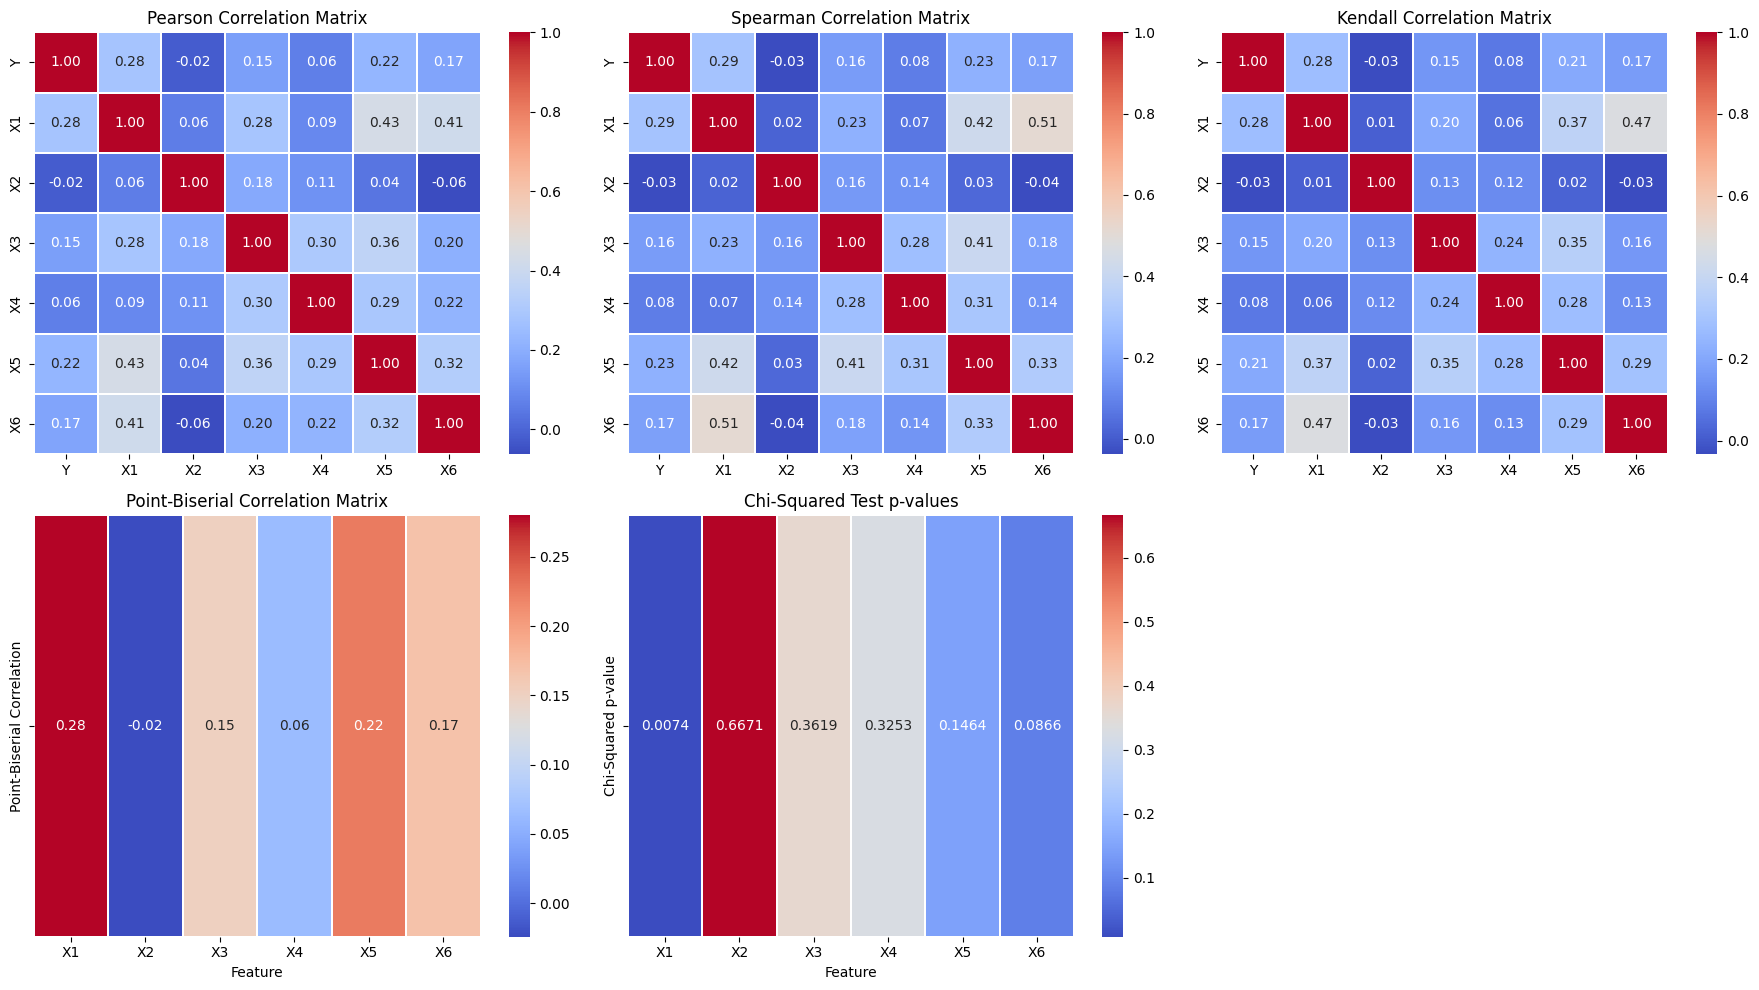

In [11]:
# Import the function from the feature_analysis.py file
from feature_analysis import analyze_correlations

# Call the function
point_biserial_df, chi_squared_df = analyze_correlations(df, features)

# Analysis and Conclusions from Statistical Tests
- **X1** should be the primary feature for the model, as it consistently shows positive correlations and statistical significance.
- **X3** and **X5** could potentially be useful, but they show weak relationships and lack significance in some tests. They should be considered for further exploration.
- **X6** and **X4** are less promising due to weak correlations and lack of statistical significance.
- **X2** should likely be excluded from the model due to its weak, insignificant relationship with the target variable.

Thus, **X1** is the best feature for the model, with **X3** and **X5** as secondary candidates for inclusion. X4 and X6 are less promising but should be considered. X2 should likely be excluded.

### Feature Combinations to Test:

1. **Single Primary Feature:**
   - `X1`

2. **Primary + Secondary Features:**
   - `X1 + X3`  
   - `X1 + X5`  
   - `X1 + X3 + X5`

3. **Primary + Secondary + Most Promising Less Promising Feature:**
   - `X1 + X3 + X5 + X6`

These combinations focus on the strongest features (`X1`, `X3`, and `X5`), with `X6` included in the last option for its moderate potential. `X4` and `X2` are excluded due to their weak and insignificant relationships.


# Multivariate Analysis

In [13]:
# Logistic Regression

# Import the function from the logistic_regression.py file
from feature_analysis import perform_logistic_regression_v1

# Call the function
result = perform_logistic_regression_v1(df, features, target)

Optimization terminated successfully.
         Current function value: 0.637875
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  126
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                 0.07367
Time:                        20:54:21   Log-Likelihood:                -80.372
converged:                       True   LL-Null:                       -86.764
Covariance Type:            nonrobust   LLR p-value:                   0.04660
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5674      1.489     -2.396      0.017      -6.486      -0.649
X1             0.5738      0.

## Logistic Regression Results

The logistic regression model was fitted to predict the dependent variable `Y` using six features (X1 to X6). The optimization terminated successfully, indicating that the model converged after 5 iterations. The key results are summarized below:

### Model Summary
- **Pseudo R-squared**: 0.07367
- **Log-Likelihood**: -80.372
- **LL-Null**: -86.764
- **LLR p-value**: 0.04660

### Interpretation
- **X1** has a statistically significant positive coefficient (p = 0.047), suggesting that higher values of X1 are associated with an increased likelihood of the outcome `Y`. This supports the findings from the univariate and bivariate analysis, where X1 was identified as a strong predictor of customer happiness. **X1** is also statistically significant with a p-value of 0.047, suggesting that it has a meaningful impact on the outcome `Y`. This confirms its role as a strong predictor.

- Variables **X2**, **X3**, **X4**, **X5**, and **X6** have p-values greater than the common threshold of 0.05, indicating that these features do not have a statistically significant impact on the outcome `Y` in this model.

### Conclusion
The multivariate logistic regression analysis highlights **X1** as a key predictor of the dependent variable, consistent with the univariate analysis findings. Further model refinement and feature selection may be necessary to improve the predictive power of the model.

### Feature Combinations to Test:
- **X1 + X5**: Moderate to strong influence, may improve predictive power.
- **X1 + X3**: Weak on its own, but may strengthen with X1.
- **X1 + X5 + X3**: Combination of moderately promising features, could enhance predictive performance.


In [14]:
# Train and evaluate Decision Tree Classifier, Random Forest Classifier,
#     Permutation importance for Random Forest and Feature Importances 
   
from feature_analysis import random_forest_feature_analysis

results = random_forest_feature_analysis(df, features, target, random_seed)

Decision Tree Accuracy: 0.5789473684210527
Decision Tree Feature Importance:
X1: 0.14142865892945433
X2: 0.2486265957468302
X3: 0.26100202270154543
X4: 0.155179913553396
X5: 0.08405588720508295
X6: 0.10970692186369109

Random Forest Accuracy: 0.5526315789473685
Random Forest Feature Importance:
X1: 0.17019590944719543
X2: 0.20096972162122168
X3: 0.1941728252956782
X4: 0.14452523341305495
X5: 0.1658230610758951
X6: 0.1243132491469548

Permutation Importance for Random Forest:
X1: 0.023684210526315846
X2: -0.05526315789473679
X3: -0.026315789473684164
X4: -0.0289473684210526
X5: 4.4408920985006264e-17
X6: -0.06842105263157888

Feature Importances (Random Forest):
X2: 0.20096972162122168
X3: 0.1941728252956782
X1: 0.17019590944719543
X5: 0.1658230610758951
X4: 0.14452523341305495
X6: 0.1243132491469548


### Random Forest Multtvariate feature analysis summary of Key Combinations to Test:
- **X5 + X3** (High importance)
- **X5 + X1** (Moderate importance)
- **X1 + X5 + X3** (Strong combined importance)
- **X1 + X2** and **X3 + X2** (Explore with caution due to lower permutation importance)

In [15]:
from feature_analysis import feature_ranking_with_rfe

# Example usage:
feature_ranking_with_rfe(df, features, target, iterations=50, random_seed=random_seed)



Running RFE for model: RandomForestClassifier
average_scores for RandomForestClassifier [4.06 2.26 3.24 4.38 1.6  5.46]
Final Feature Importance Ranking for RandomForestClassifier (lower scores are more important):
X5: 1.60
X2: 2.26
X3: 3.24
X1: 4.06
X4: 4.38
X6: 5.46

Running RFE for model: LogisticRegression
average_scores for LogisticRegression [1.12 4.62 4.1  4.14 2.66 4.36]
Final Feature Importance Ranking for LogisticRegression (lower scores are more important):
X1: 1.12
X5: 2.66
X3: 4.10
X4: 4.14
X6: 4.36
X2: 4.62

Running RFE for model: DecisionTreeClassifier
average_scores for DecisionTreeClassifier [3.76 2.94 3.04 3.5  3.08 4.68]
Final Feature Importance Ranking for DecisionTreeClassifier (lower scores are more important):
X2: 2.94
X3: 3.04
X5: 3.08
X4: 3.50
X1: 3.76
X6: 4.68

Running RFE for model: SVC
average_scores for SVC [1.3  4.92 3.88 3.88 3.34 3.68]
Final Feature Importance Ranking for SVC (lower scores are more important):
X1: 1.30
X5: 3.34
X6: 3.68
X3: 3.88
X4: 3.8

### RFE Promising Feature Combinations

#### **RandomForestClassifier**
1. **X5 + X2**  
2. **X5 + X3**  
3. **X5 + X2 + X3**  

#### **LogisticRegression**
1. **X1 + X5**  
2. **X1 + X5 + X2**  

#### **DecisionTreeClassifier**
1. **X5 + X2**  
2. **X5 + X2 + X3**  
3. **X5 + X2 + X3 + X1**

#### **SVC**
1. **X1 + X5**  
2. **X5 + X4**  
3. **X1 + X5 + X4**  

#### **GradientBoostingClassifier**
1. **X1 + X5**  
2. **X1 + X5 + X3**  

#### **AdaBoostClassifier**
1. **X4 + X1**  
2. **X1 + X6**  
3. **X1 + X6 + X5**

#### **ExtraTreesClassifier**
1. **X1 + X5**  
2. **X1 + X5 + X2**  
3. **X1 + X5 + X2 + X3**

#### **RidgeClassifier**
1. **X1 + X5**  
2. **X1 + X5 + X3**  

#### **Lasso**
1. **X6 + X5**  
2. **X6 + X5 + X4**  

#### **SGDClassifier**
1. **X1 + X5**  
2. **X1 + X5 + X4**

---

### **Aggregated Feature Rankings (Across All Models)**

1. **X1 + X5**  
2. **X5 + X2**  
3. **X5 + X3**  
4. **X1 + X5 + X3**  
5. **X1 + X5 + X2**  
6. **X5 + X2 + X3**  
7. **X1 + X5 + X6**  
8. **X1 + X5 + X2 + X3**


# **Aggregated Feature Rankings**

## **Most Likely Feature Combinations (Ranked by Mentions Across Tests)**

### **2-Feature Combinations**
1. **X1 + X5**  
   - Mentioned in: Logistic Regression, SVC, GradientBoostingClassifier, RidgeClassifier, SGDClassifier, RFE Summary, KDE Analysis, Violin Plot.
2. **X5 + X3**  
   - Mentioned in: Random Forest Multivariate Analysis, RFE, KDE Analysis, Violin Plot.
3. **X5 + X2**  
   - Mentioned in: RandomForestClassifier, DecisionTreeClassifier, ExtraTreesClassifier.
4. **X1 + X3**  
   - Mentioned in: Logistic Regression, KDE Analysis, Violin Plot.
5. **X6 + X5**  
   - Mentioned in: Lasso, AdaBoostClassifier.
6. **X1 + X6**  
   - Mentioned in: AdaBoostClassifier.
7. **X5 + X4**  
   - Mentioned in: SVC.

---

### **3-Feature Combinations**
1. **X1 + X5 + X3**  
   - Mentioned in: Logistic Regression, Random Forest, RFE Summary, RidgeClassifier, GradientBoostingClassifier.
2. **X5 + X2 + X3**  
   - Mentioned in: RFE Summary, RandomForestClassifier, DecisionTreeClassifier.
3. **X1 + X5 + X2**  
   - Mentioned in: ExtraTreesClassifier, Logistic Regression, RFE Summary.
4. **X6 + X5 + X4**  
   - Mentioned in: Lasso.
5. **X1 + X5 + X4**  
   - Mentioned in: SVC, SGDClassifier.

---

### **4-Feature Combinations**
1. **X1 + X5 + X2 + X3**  
   - Mentioned in: RFE Summary, ExtraTreesClassifier.
2. **X1 + X5 + X3 + X6**  
   - Mentioned in: Random Forest, RFE Summary.
3. **X5 + X2 + X3 + X1**  
   - Mentioned in: DecisionTreeClassifier.

---

### **5-Feature Combinations**
1. **X1 + X5 + X3 + X6 + X2**  
   - Aggregated from summaries but mentioned less frequently.

---

### **Key Observations**
- **Most Promising Single Feature:** X1 is the strongest individual feature.  
- **Core Pairing:** X1 + X5 dominates as the most promising and frequently mentioned combination.  
- **Feature X2:** Often appears in combinations with X5 and X3 despite lower importance individually.  
- **Feature X6:** Appears in some 3- and 4-feature combinations but is less frequent overall.

---

### Next Steps
Let’s visualize the data with detailed plots and decision trees to further analyze the feature combinations.


In [16]:
from lazy_predict import run_lazy_classifier
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import pandas as pd

# List of feature combinations and their sources
feature_combinations = [
    (['X1', 'X5'], "Logistic Regression, SVC, GradientBoostingClassifier, RidgeClassifier, SGDClassifier, RFE Summary, KDE Analysis, Violin Plot"),
    (['X5', 'X3'], "Random Forest Multivariate Analysis, RFE, KDE Analysis, Violin Plot"),
    (['X5', 'X2'], "RandomForestClassifier, DecisionTreeClassifier, ExtraTreesClassifier"),
    (['X1', 'X3'], "Logistic Regression, KDE Analysis, Violin Plot"),
    (['X6', 'X5'], "Lasso, AdaBoostClassifier"),
    (['X1', 'X6'], "AdaBoostClassifier"),
    (['X5', 'X4'], "SVC"),
    (['X1', 'X5', 'X3'], "Logistic Regression, Random Forest, RFE Summary, RidgeClassifier, GradientBoostingClassifier"),
    (['X5', 'X2', 'X3'], "RFE Summary, RandomForestClassifier, DecisionTreeClassifier"),
    (['X1', 'X5', 'X2'], "ExtraTreesClassifier, Logistic Regression, RFE Summary"),
    (['X6', 'X5', 'X4'], "Lasso"),
    (['X1', 'X5', 'X4'], "SVC, SGDClassifier"),
    (['X1', 'X5', 'X2', 'X3'], "RFE Summary, ExtraTreesClassifier"),
    (['X1', 'X5', 'X3', 'X6'], "Random Forest, RFE Summary"),
    (['X5', 'X2', 'X3', 'X1'], "DecisionTreeClassifier"),
    (['X1', 'X5', 'X3', 'X6', 'X2'], "Aggregated from summaries but mentioned less frequently")
]

# Dataframe to store results
results = []

# Loop through each feature combination
for features, mentioned_in in feature_combinations:
    X = df[features]
    y = df['Y']  # Target column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Run lazy_predict
    models, predictions = run_lazy_classifier(X_train, X_test, y_train, y_test)
    
    # Extract the top 3 models by accuracy
    top_models = models.head(3)  # Get the top 3 models
    
    # Store results for each feature combination
    for model_name, row in top_models.iterrows():
        results.append({
            "Feature Combination": ", ".join(features),
            "Mentioned In": mentioned_in,
            "Model": model_name,
            "Accuracy": row['Accuracy'],
            "F1 Score": row['F1 Score']
        })

# Convert results into a DataFrame for tabulation
results_df = pd.DataFrame(results)

# Print the table with tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 21.99it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 36.45it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 37.94it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 34.23it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 29.94it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 33.49it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 30.43it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 30.99it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 29.36it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 30.86it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 31.90it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 23.91it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 32.57it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 29.17it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 29.38it/s]


[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 31.95it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [17]:
from lazy_predict import run_lazy_classifier

X = df[['X2', 'X3', 'X5']] # Features 
y = df['Y']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# call run_lazy_classifier
models, predictions = run_lazy_classifier(X_train, X_test, y_train, y_test)

# Print the results
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 31.90it/s]

[LightGBM] [Info] Number of positive: 55, number of negative: 45
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550000 -> initscore=0.200671
[LightGBM] [Info] Start training from score 0.200671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [1]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Run lazy predict with num_trials number of times, pick a chosen_metric to order results by 
#    and define what features to retain in variable X

# This function does num_trials number of trials randomly picking a random seed each trial
#    and averages the scores of all 50 trials and then orders them according to your 
#    chosen_metric Choices are: 'F1', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', or 'Time Taken'
#    You can define X to use the features you deem necessary
from tabulate import tabulate

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.colheader_justify', 'center')  # Center align headers

# Initialize variables
num_trials = 50
random_seeds = [random.randint(1000, 9999) for _ in range(num_trials)]
f1_scores = {}
accuracy_scores = {}
balanced_accuracy_scores = {}
roc_auc_scores = {}
time_taken = {}

# Variable to choose the sorting metric
chosen_metric = 'F1'  # Choices are: 'F1', 'Accuracy', 'Balanced Accuracy', 'ROC AUC', or 'Time Taken'
X_lp = df[['X2', 'X3', 'X5']] # Features 
y_lp = df['Y']  # Target column
# Loop through the random seeds and calculate the metrics
for my_seed in random_seeds:
    X_lp_train, lp_, y_lp_train, y_lp_test = train_test_split(X_lp, y_lp, test_size=test_size, random_state=my_seed)
    
    # Initialize and fit the LazyClassifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    #models, predictions = clf.fit(X1_train, X1_test, y_train, y_test)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    
    # Store the metrics for each model
    for model_name in models.index:
        f1_scores.setdefault(model_name, []).append(models.loc[model_name, 'F1 Score'])
        accuracy_scores.setdefault(model_name, []).append(models.loc[model_name, 'Accuracy'])
        balanced_accuracy_scores.setdefault(model_name, []).append(models.loc[model_name, 'Balanced Accuracy'])
        roc_auc_scores.setdefault(model_name, []).append(models.loc[model_name, 'ROC AUC'])
        time_taken.setdefault(model_name, []).append(models.loc[model_name, 'Time Taken'])

# Calculate average scores for each metric
average_scores = {
    'f1': {model: sum(scores) / len(scores) for model, scores in f1_scores.items()},
    'accuracy': {model: sum(scores) / len(scores) for model, scores in accuracy_scores.items()},
    'balanced_accuracy': {model: sum(scores) / len(scores) for model, scores in balanced_accuracy_scores.items()},
    'roc_auc': {model: sum(scores) / len(scores) for model, scores in roc_auc_scores.items()},
    'time': {model: sum(scores) / len(scores) for model, scores in time_taken.items()},
}
# Combine all average metrics into a single DataFrame
all_metrics_df = pd.DataFrame({
    'Model': list(f1_scores.keys()),
    'Average F1 Score': [average_scores['f1'][model] for model in f1_scores.keys()],
    'Average Accuracy': [average_scores['accuracy'][model] for model in f1_scores.keys()],
    'Average Balanced Accuracy': [average_scores['balanced_accuracy'][model] for model in f1_scores.keys()],
    'Average ROC AUC': [average_scores['roc_auc'][model] for model in f1_scores.keys()],
    'Average Time Taken': [average_scores['time'][model] for model in f1_scores.keys()],
})

# Sort the models based on the chosen metric
if chosen_metric in ['ROC AUC', 'Balanced Accuracy']:
    sorted_df = all_metrics_df.sort_values(by=f'Average {chosen_metric}', ascending=False)
elif chosen_metric == 'F1':
    sorted_df = all_metrics_df.sort_values(by=f'Average {chosen_metric} Score', ascending=False)
elif chosen_metric == 'Time Taken':
    sorted_df = all_metrics_df.sort_values(by=f'Average {chosen_metric}', ascending=True)  # Corrected typo
else:
    sorted_df = all_metrics_df.sort_values(by=f'Average {chosen_metric.capitalize()}', ascending=False)

print(tabulate(sorted_df, headers='keys', tablefmt='pretty', showindex=False))

NameError: name 'pd' is not defined